# DocBins Annotations Exploration




In [1]:
import os
import pandas as pd
import spacy
from spacy.tokens import DocBin

import matplotlib.pyplot as plt
import seaborn as sns


/opt/homebrew/Caskroom/miniforge/base/envs/prodigy-py39/lib/python3.9/site-packages/thinc/compat.py:36: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  hasattr(torch, "has_mps")
/opt/homebrew/Caskroom/miniforge/base/envs/prodigy-py39/lib/python3.9/site-packages/thinc/compat.py:37: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  and torch.has_mps  # type: ignore[attr-defined]


## Read the serialized bytes from the file

In [2]:
bin_path = os.path.join('datasets', 'spacy')

In [3]:
jsonl = []

nlp = spacy.load("fr_spacy_custom_spancat_edda")

for dataset in ["train", "val", "test"]:
    with open(os.path.join(bin_path, dataset+'.spacy'), "rb") as f:
        serialized_bytes = f.read()

    doc_bin = DocBin().from_bytes(serialized_bytes)

    docs = list(doc_bin.get_docs(nlp.vocab))

    for doc in docs:
        jsonl.append(dict({'dataset':dataset}, **doc.to_json()))

In [4]:
options = {'colors': {'NP-Spatial': '#27AE60', 'NC-Spatial': '#85C1E9','ENE-Spatial': '#196F3D', 'Relation': '#F5B041'}}
spacy.displacy.render(docs[0], style='span', options=options, jupyter=True)

In [5]:
spacy.displacy.render(docs[1], style='span', options=options, jupyter=True)

* The meta entry from the jsonl file has not been stored in the serialized bytes format. For a more detailed exploration see notebook `jsonl_exploration.ipynb`

In [6]:
jsonl[0]


{'dataset': 'train',
 'text': "ILLESCAS, (Géog.) petite ville d'Espagne, dans la nouvelle Castille, à six lieues au sud de Madrid.",
 'sents': [{'start': 0, 'end': 17}, {'start': 18, 'end': 99}],
 'tokens': [{'id': 0, 'start': 0, 'end': 8},
  {'id': 1, 'start': 8, 'end': 9},
  {'id': 2, 'start': 10, 'end': 11},
  {'id': 3, 'start': 11, 'end': 15},
  {'id': 4, 'start': 15, 'end': 16},
  {'id': 5, 'start': 16, 'end': 17},
  {'id': 6, 'start': 18, 'end': 24},
  {'id': 7, 'start': 25, 'end': 30},
  {'id': 8, 'start': 31, 'end': 33},
  {'id': 9, 'start': 33, 'end': 40},
  {'id': 10, 'start': 40, 'end': 41},
  {'id': 11, 'start': 42, 'end': 46},
  {'id': 12, 'start': 47, 'end': 49},
  {'id': 13, 'start': 50, 'end': 58},
  {'id': 14, 'start': 59, 'end': 67},
  {'id': 15, 'start': 67, 'end': 68},
  {'id': 16, 'start': 69, 'end': 70},
  {'id': 17, 'start': 71, 'end': 74},
  {'id': 18, 'start': 75, 'end': 81},
  {'id': 19, 'start': 82, 'end': 84},
  {'id': 20, 'start': 85, 'end': 88},
  {'id': 2

In [7]:
df = pd.DataFrame(jsonl)

df.head()

,dataset,text,sents,tokens,spans
0,train,"ILLESCAS, (Géog.) petite ville d'Espagne, dans...","[{'start': 0, 'end': 17}, {'start': 18, 'end':...","[{'id': 0, 'start': 0, 'end': 8}, {'id': 1, 's...","{'sc': [{'start': 0, 'end': 8, 'label': 'Head'..."
1,train,"MULHAUSEN, (Géog.) ville impériale d'Allemagne...","[{'start': 0, 'end': 18}, {'start': 19, 'end':...","[{'id': 0, 'start': 0, 'end': 9}, {'id': 1, 's...","{'sc': [{'start': 0, 'end': 9, 'label': 'Head'..."
2,train,"* ADDA, riviere de Suisse & d'Italie, qui a sa...","[{'start': 0, 'end': 136}]","[{'id': 0, 'start': 0, 'end': 1}, {'id': 1, 's...","{'sc': [{'start': 2, 'end': 6, 'label': 'Head'..."
3,train,"SINTRA ou CINTRA, (Géog. mod.) montagne de Por...","[{'start': 0, 'end': 24}, {'start': 25, 'end':...","[{'id': 0, 'start': 0, 'end': 6}, {'id': 1, 's...","{'sc': [{'start': 0, 'end': 16, 'label': 'Head..."
4,train,"* ACHSTEDE, ou AKSTEDE, s. petite Ville d'Alle...","[{'start': 0, 'end': 86}]","[{'id': 0, 'start': 0, 'end': 1}, {'id': 1, 's...","{'sc': [{'start': 2, 'end': 22, 'label': 'Head..."


### Number of paragraphs

In [8]:
len(df)

2200

## Count the spans

In [9]:
def get_number_spans(data):
    d = {}
    for obj in data:
        for span in obj['spans']['sc']:
                k = span['label']
                if k not in d:
                    d[k] = 1
                else:
                    d[k] += 1
    return d


def plot_pie_chart_spans(spans, ordered_list=None):
    if ordered_list is not None:
        sorted_data = {tag: spans[tag] for tag in ordered_list if tag in spans}
    else:
        sorted_data = spans
    plt.rcParams['font.size'] = 12
    plt.figure(figsize=(8, 8))
    plt.pie(list(sorted_data.values()), colors = sns.color_palette("Paired"), labels=list(sorted_data.keys()), autopct='%1.1f%%', startangle=90)


* Get distribution of spans for each dataset

{'Head': 1261, 'Domain-mark': 1069, 'NC-Spatial': 3252, 'ENE-Spatial': 3033, 'NP-Spatial': 4707, 'Relation': 2093, 'NC-Person': 1378, 'ENE-Person': 492, 'NP-Person': 1599, 'NP-Misc': 948, 'Latlong': 553, 'ENE-Misc': 255}


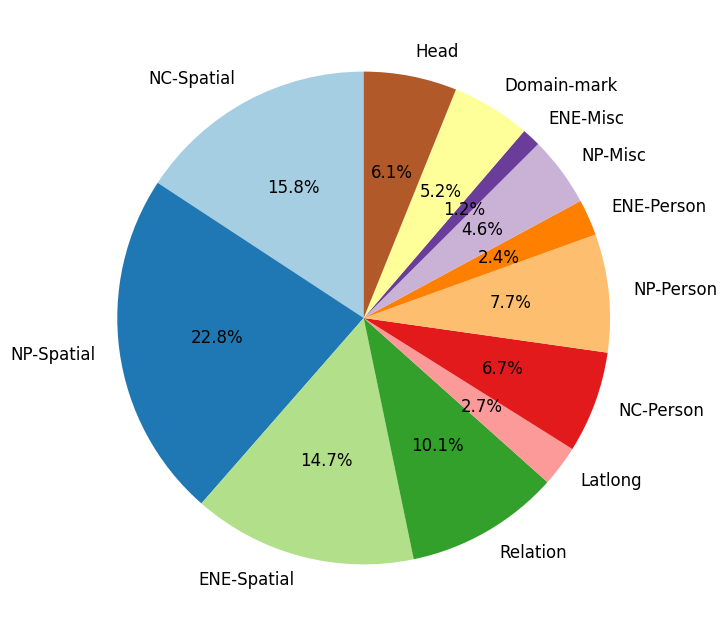

In [10]:
data_train = df[df.dataset == 'train'].to_dict(orient='records')

spans = get_number_spans(data_train)
print(spans)
ordered_list = ['NC-Spatial', 'NP-Spatial', 'ENE-Spatial', 'Relation','Latlong', 'NC-Person', 'NP-Person','ENE-Person', 'NP-Misc', 'ENE-Misc', 'Domain-mark', 'Head']
plot_pie_chart_spans(spans, ordered_list)

{'Head': 142, 'Domain-mark': 122, 'NC-Spatial': 358, 'ENE-Spatial': 326, 'NP-Spatial': 464, 'Relation': 219, 'Latlong': 66, 'NP-Person': 170, 'NC-Person': 132, 'ENE-Person': 49, 'NP-Misc': 108, 'ENE-Misc': 31}


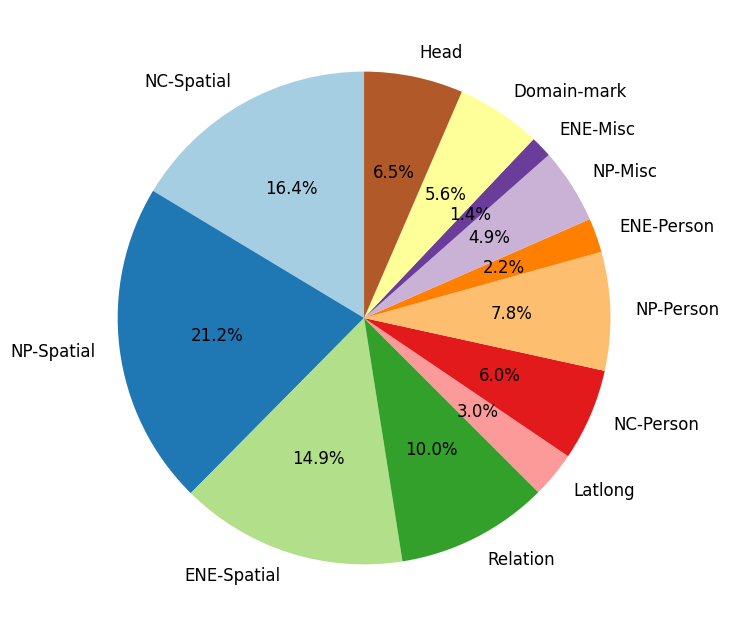

In [11]:
data_train = df[df.dataset == 'val'].to_dict(orient='records')

spans = get_number_spans(data_train)
print(spans)
ordered_list = ['NC-Spatial', 'NP-Spatial', 'ENE-Spatial', 'Relation','Latlong', 'NC-Person', 'NP-Person','ENE-Person', 'NP-Misc', 'ENE-Misc', 'Domain-mark', 'Head']
plot_pie_chart_spans(spans, ordered_list)

{'Head': 153, 'Domain-mark': 133, 'NC-Spatial': 355, 'ENE-Spatial': 334, 'NP-Spatial': 519, 'Relation': 226, 'Latlong': 72, 'NC-Person': 133, 'NP-Person': 150, 'NP-Misc': 96, 'ENE-Person': 57, 'ENE-Misc': 22}


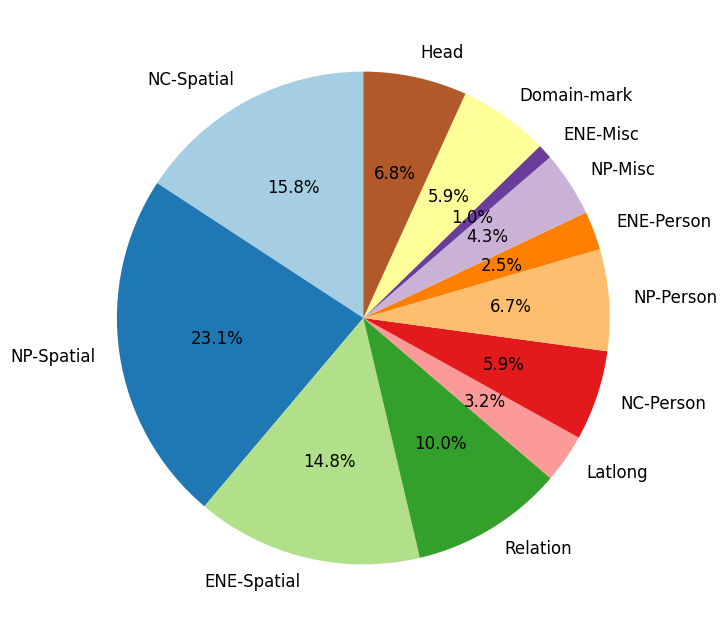

In [12]:
data_train = df[df.dataset == 'test'].to_dict(orient='records')

spans = get_number_spans(data_train)
print(spans)
ordered_list = ['NC-Spatial', 'NP-Spatial', 'ENE-Spatial', 'Relation','Latlong', 'NC-Person', 'NP-Person','ENE-Person', 'NP-Misc', 'ENE-Misc', 'Domain-mark', 'Head']
plot_pie_chart_spans(spans, ordered_list)